# Data Loading

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sairahi","key":"79735b89bc85df07bff30fffc332d575"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d msambare/fer2013

 40% 24.0M/60.3M [00:00<00:00, 249MB/s]
100% 60.3M/60.3M [00:00<00:00, 316MB/s]


In [ ]:
!unzip fer2013.zip



---

# Data Augmentation

In [ ]:
#import libraries
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = "./train" # Directory containing the training data
test_dir = "./test"  # Directory containing the validation data

In [ ]:
img_size = 48
batch_size = 64

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    horizontal_flip=True)

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(train_dir,
                                            target_size = (img_size, img_size),
                                             color_mode = 'grayscale',
                                             batch_size = batch_size,
                                             class_mode = 'categorical',
                                             shuffle = True)

test_generator = test_datagen.flow_from_directory(test_dir,
                                             target_size = (img_size, img_size),
                                             color_mode = 'grayscale',
                                             batch_size = batch_size,
                                             class_mode = 'categorical',
                                             shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.




---

# Data Modelling


### CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
#train the model
import tensorflow as tf
from tensorflow.keras import layers, models

model_cnn = models.Sequential([
    layers.Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 1), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.PReLU(alpha_initializer='zeros'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (5, 5), padding='same'),
    layers.BatchNormalization(),
    layers.PReLU(alpha_initializer='zeros'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.PReLU(alpha_initializer='zeros'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.PReLU(alpha_initializer='zeros'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(1024),
    layers.BatchNormalization(),
    layers.PReLU(alpha_initializer='zeros'),
    layers.Dropout(0.2),

    layers.Dense(1024),
    layers.BatchNormalization(),
    layers.PReLU(alpha_initializer='zeros'),
    layers.Dropout(0.2),

    layers.Dense(7, activation='softmax')
])

#compile the model
model_cnn.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

#callbacks
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("model_weights.h5", monitor='val_accuracy', save_weights_only=True,
                                       mode='max', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=3, verbose=1),
    tf.keras.callbacks.ModelCheckpoint("model.h5", monitor='val_loss', verbose=1, save_best_only=True)
]

In [ ]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_12 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 p_re_lu_12 (PReLU)          (None, 48, 48, 64)        147456    
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 batch_normalization_13 (Ba  (None, 24, 24, 128)      

In [ ]:
#fit the model
history = model_cnn.fit(train_generator, epochs=25, validation_data=test_generator,
                    callbacks=callbacks)

Epoch 1/25
449/449 [==============================] - ETA: 0s - loss: 1.5555 - accuracy: 0.4074
Epoch 1: saving model to model_weights.h5

Epoch 1: val_loss improved from inf to 1.45437, saving model to model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


449/449 [==============================] - 30s 67ms/step - loss: 1.5555 - accuracy: 0.4074 - val_loss: 1.4544 - val_accuracy: 0.4500 - lr: 0.0010
Epoch 2/25
449/449 [==============================] - ETA: 0s - loss: 1.3709 - accuracy: 0.4787
Epoch 2: saving model to model_weights.h5

Epoch 2: val_loss improved from 1.45437 to 1.42866, saving model to model.h5
449/449 [==============================] - 29s 64ms/step - loss: 1.3709 - accuracy: 0.4787 - val_loss: 1.4287 - val_accuracy: 0.4582 - lr: 0.0010
Epoch 3/25
449/449 [==============================] - ETA: 0s - loss: 1.2761 - accuracy: 0.5193
Epoch 3: saving model to model_weights.h5

Epoch 3: val_loss improved from 1.42866 to 1.41437, saving model to model.h5
449/449 [==============================] - 32s 71ms/step - loss: 1.2761 - accuracy: 0.5193 - val_loss: 1.4144 - val_accuracy: 0.4806 - lr: 0.0010
Epoch 4/25
449/449 [==============================] - ETA: 0s - loss: 1.2166 - accuracy: 0.5433
Epoch 4: saving model to model_wei

Total params: 9260551 (35.33 MB)
<br>Trainable params: 9254023 (35.30 MB)
<br>Non-trainable params: 6528 (25.50 KB)
<br>Accuracy: 63.23



---

### VGG16 Model

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                            target_size = (img_size, img_size),
                                             color_mode = 'rgb',
                                             batch_size = batch_size,
                                             class_mode = 'categorical',
                                             shuffle = True)

test_generator = test_datagen.flow_from_directory(test_dir,
                                             target_size = (img_size, img_size),
                                             color_mode = 'rgb',
                                             batch_size = batch_size,
                                             class_mode = 'categorical',
                                             shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# model building
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Load VGG16 base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create the custom top layers
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(7, activation='softmax')(x)

# Create the final model
model_vgg16 = Model(base_model.input, output)

# Compile the model
model_vgg16.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model_vgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [ ]:
#model fitting
history = model_vgg16.fit(train_generator, epochs=50, validation_data=test_generator, callbacks=[checkpoint, early_stop, reduce_lr])

Epoch 1/50
449/449 [==============================] - ETA: 0s - loss: 1.7372 - accuracy: 0.3022
Epoch 1: val_accuracy improved from -inf to 0.36751, saving model to best_model.h5
449/449 [==============================] - 42s 88ms/step - loss: 1.7372 - accuracy: 0.3022 - val_loss: 1.6341 - val_accuracy: 0.3675 - lr: 0.0010


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/50
449/449 [==============================] - ETA: 0s - loss: 1.6695 - accuracy: 0.3367
Epoch 2: val_accuracy improved from 0.36751 to 0.37058, saving model to best_model.h5
449/449 [==============================] - 39s 87ms/step - loss: 1.6695 - accuracy: 0.3367 - val_loss: 1.5952 - val_accuracy: 0.3706 - lr: 0.0010
Epoch 3/50
449/449 [==============================] - ETA: 0s - loss: 1.6495 - accuracy: 0.3507
Epoch 3: val_accuracy improved from 0.37058 to 0.38437, saving model to best_model.h5
449/449 [==============================] - 41s 91ms/step - loss: 1.6495 - accuracy: 0.3507 - val_loss: 1.5890 - val_accuracy: 0.3844 - lr: 0.0010
Epoch 4/50
449/449 [==============================] - ETA: 0s - loss: 1.6358 - accuracy: 0.3550
Epoch 4: val_accuracy improved from 0.38437 to 0.39036, saving model to best_model.h5
449/449 [==============================] - 39s 86ms/step - loss: 1.6358 - accuracy: 0.3550 - val_loss: 1.5756 - val_accuracy: 0.3904 - lr: 0.0010
Epoch 5/50
449/4

In [ ]:
#model fitting
history = model_vgg16.fit(train_generator, epochs=50, validation_data=test_generator, callbacks=[checkpoint, early_stop, reduce_lr])

Epoch 1/10


<ipython-input-26-851bb81385aa>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_vgg16.fit_generator(


449/449 [==============================] - 583s 1s/step - loss: 1.5394 - accuracy: 0.4021 - val_loss: 1.5176 - val_accuracy: 0.4123
Epoch 2/10
449/449 [==============================] - 628s 1s/step - loss: 1.5249 - accuracy: 0.4121 - val_loss: 1.4982 - val_accuracy: 0.4288
Epoch 3/10
449/449 [==============================] - 583s 1s/step - loss: 1.5152 - accuracy: 0.4158 - val_loss: 1.4756 - val_accuracy: 0.4323
Epoch 4/10
449/449 [==============================] - 583s 1s/step - loss: 1.5091 - accuracy: 0.4175 - val_loss: 1.4612 - val_accuracy: 0.4405
Epoch 5/10
449/449 [==============================] - 586s 1s/step - loss: 1.4939 - accuracy: 0.4232 - val_loss: 1.4546 - val_accuracy: 0.4454
Epoch 6/10
449/449 [==============================] - 590s 1s/step - loss: 1.4890 - accuracy: 0.4272 - val_loss: 1.4404 - val_accuracy: 0.4541
Epoch 7/10
449/449 [==============================] - 580s 1s/step - loss: 1.4786 - accuracy: 0.4315 - val_loss: 1.4284 - val_accuracy: 0.4553
Epoch 8/10

Total params: 14781255 (56.39 MB)
<br>Trainable params: 66567 (260.03 KB)
<br>Non-trainable params: 14714688 (56.13 MB)
<br>max val_aacuracy: 46.32

# Conclusion


*   Accuracy: CNN Model has a higher accuracy, indicating that it performs better in terms of correctly classifying the input data. If accuracy is the primary concern and there are no constraints on model complexity or computational resources, Model 1 it may be preferable.
*   Trainable Parameters: VGG16 Model has fewer trainable parameters compared. Having fewer trainable parameters can lead to faster training times, reduced memory requirements, and potentially better generalization, especially when working with limited training data. If computational resources are limited or if there is a need for a simpler model, Model 2 may be a better choice.
<br>
If computational resources are not a concern and achieving higher accuracy is paramount, Model 1 may be preferable. However, if resources are limited or if simplicity and efficiency are important considerations, Model 2 may be the better choice despite its lower accuracy.

We consider the VGG16 model to be the optimal choice because it substantially reduces the number of trainable parameters while still achieving sufficiently high accuracy. This trade-off between the two factors is deemed acceptable.



---

# Data Visualization

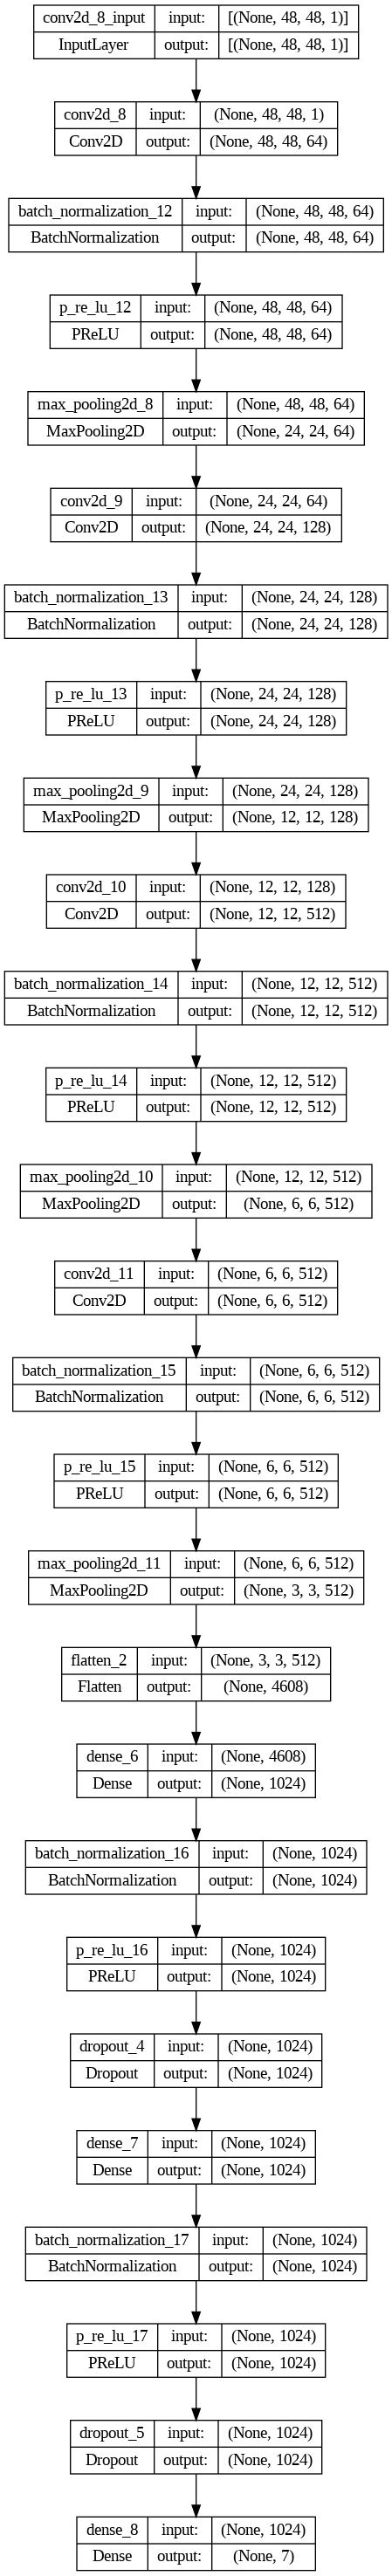

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(
    model_cnn,
    to_file='fernet1.png',
    show_shapes=True,
    show_layer_names=True
)

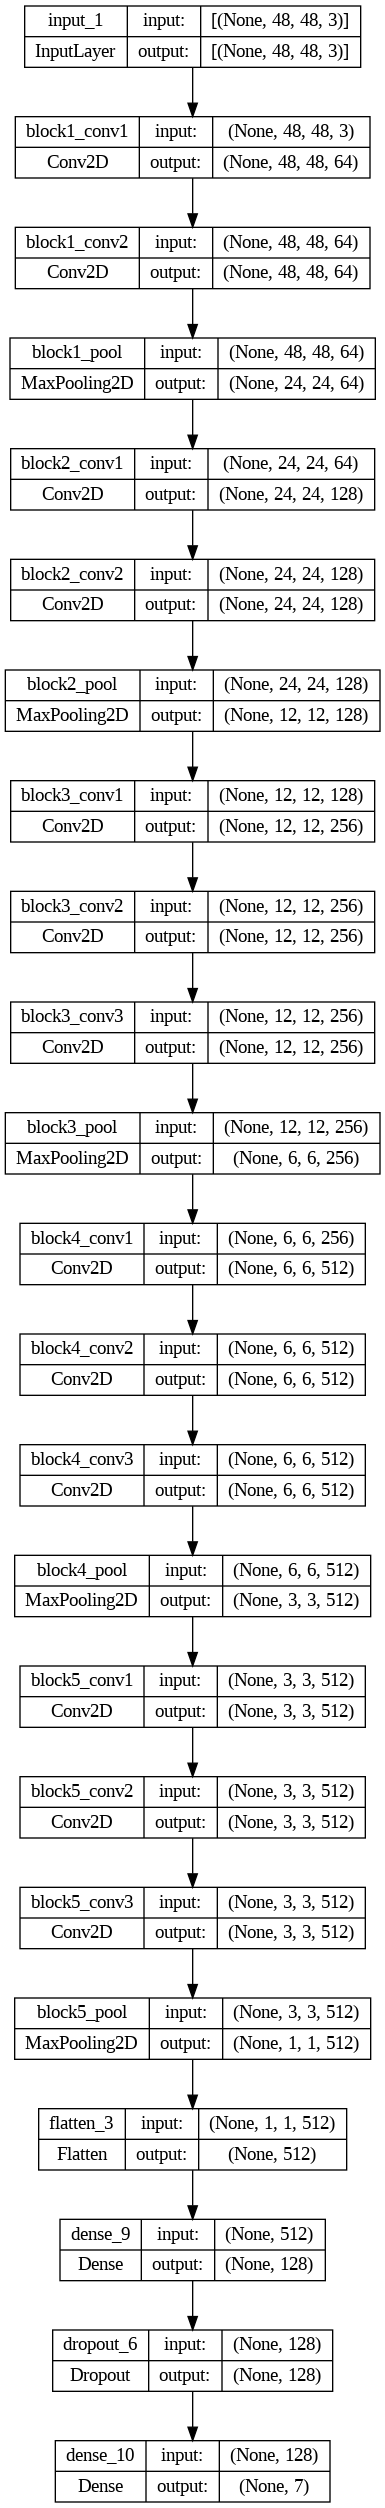

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(
    model_vgg16,
    to_file='fernet2.png',
    show_shapes=True,
    show_layer_names=True
)